<a href="https://colab.research.google.com/github/prabinrs/ku_hmis_205/blob/patch-1/KU_BHI_signalprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: ECG Signal Loading and Visualization
## Medical Signal Processing & Telemedicine Integration

---

## Learning Objectives
By the end of this lab, you will be able to:
1. Load ECG waveforms from MIMIC-III Waveform Database
2. Understand ECG signal characteristics (sampling rate, leads, duration)
3. Create professional medical signal visualizations
4. Identify basic ECG components (P, QRS, T waves)

## Setup

In [1]:
! pip install WFDB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from IPython.display import display,Markdown

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 8)

print("Libraries imported successfully")
print(f"WFDB version: {wfdb.__version__}")

Libraries imported successfully
WFDB version: 4.3.0


---

## Part 1: Loading ECG Data

We'll use the MIMIC-III Waveform Database Matched Subset. This contains continuous waveform recordings from ICU patients.
link : https://physionet.org/content/mimic3wdb-matched/1.0/

The total size is around 2 TB, so for the class we will download 10 to 15 patient's data only.

**Optional**
If you want to use the dataset to create Machine Learning Project, there are multiple annotation are avaliable:

for AF : https://figshare.com/articles/dataset/Atrial_Fibrillation_annotations_of_electrocardiogram_from_MIMIC_III_matched_subset/12149091?file=22340070 (for the old version)

for Sepesis : https://figshare.com/articles/dataset/ECG_sepsis_xlsx/24265717?file=42594220


### Background: MIMIC-III Waveform Structure
- **Directory structure:** `physionet.org/files/mimic3wdb-matched/1.o/p00/p0000XX/`
- **Files per record:**
  - `.hea` - Header file with metadata
  - `.dat` - Binary signal data
  - `.atr` - Annotations (if available)



### Downlaod files to local drive (colab drive):

I prefer bash command directly from the notebook to download the data to root folder while using colab, but you are free to download manually if you are using local machine.


Play with the list of subfolders , here are some list of subfolers in p00 folder. Feel free to check pysionet's site and make changes, you can also use other folders p01 p02 .... p09



SUBFOLDERS=(
  "p000020"
  "p000030"
  "p000033"
  "p000052"
  "p000079"
  "p000085"
  "p000107"
  "p000109"
  "p000123"
  "p000124"
  "p000125"
  "p000135"
  "p000138"
  "p000145"
  "p000154"
  "p000160"
  "p000177")

  ### Good and Bad Examples of ECG:
  Good : /p00/p000030/3524877_0001

  Bad : /poo/p000020/3544749_0001

In [4]:
%%bash

# Define the exact list of subfolders you want
SUBFOLDERS=(
  "p000020"
  "p000030"
)


# This is the URL for the p00 folder
BASE_URL="https://physionet.org/files/mimic3wdb-matched/1.0/p00/"

# Loop through each subfolder and download it recursively
for FOLDER in "${SUBFOLDERS[@]}"
do
  echo "--- Downloading ${FOLDER} ---"
  # We add the folder name to the base URL to get the full path
  wget -r -N -c -np "${BASE_URL}${FOLDER}/"
done

echo "--- All specific folders downloaded! ---"

--- Downloading p000020 ---
--- Downloading p000030 ---
--- All specific folders downloaded! ---


--2025-11-20 02:20:28--  https://physionet.org/files/mimic3wdb-matched/1.0/p00/p000020/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/mimic3wdb-matched/1.0/p00/p000020/index.html’

     0K ..                                                      350M=0s

Last-modified header missing -- time-stamps turned off.
2025-11-20 02:20:28 (350 MB/s) - ‘physionet.org/files/mimic3wdb-matched/1.0/p00/p000020/index.html’ saved [2816]

Loading robots.txt; please ignore errors.
--2025-11-20 02:20:28--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

     0K                                                       100% 10.7M=0s

2025-11-20 02:20:28 (10.7 MB/s) - ‘physionet

### Exercise 1.1: Load a Single ECG Record

In [6]:
record_name = '3524877_0001'
pn_dir = '/content/physionet.org/files/mimic3wdb-matched/1.0/p00/p000030/'

# SOLUTION: Load the record
record = wfdb.rdrecord(pn_dir+record_name)

# Display basic information
print("=" * 60)
print("ECG RECORD INFORMATION")
print("=" * 60)
print(f"Record Name: {record.record_name}")
print(f"Sampling Frequency: {record.fs} Hz")
print(f"Number of Signals: {record.n_sig}")
print(f"Signal Names: {record.sig_name}")
print(f"Duration: {record.sig_len / record.fs:.2f} seconds ({record.sig_len / record.fs / 60:.2f} minutes)")
print(f"Signal Shape: {record.p_signal.shape}")
print(f"Units: {record.units}")
Markdown(f"For example, if shape is {record.p_signal.shape}, this means: \n - {record.p_signal.shape[0]} time sample \n - {record.p_signal.shape[1]} different signal channels(ECG leads)")

ECG RECORD INFORMATION
Record Name: 3524877_0001
Sampling Frequency: 125 Hz
Number of Signals: 2
Signal Names: ['II', 'V']
Duration: 3600.00 seconds (60.00 minutes)
Signal Shape: (450000, 2)
Units: ['mV', 'mV']


For example, if shape is (450000, 2), this means: 
 - 450000 time sample 
 - 2 different signal channels(ECG leads)

**Question 1.1:** What do the dimensions of `record.p_signal.shape` represent?

** Answer:**  
- **First dimension (rows):** Number of samples (time points)
- **Second dimension (columns):** Number of signals/channels (different leads)

For example, if shape is (2811, 4), this means:
- 3811 time samples
- 4 different signal channels (e.g., different ECG leads)

---

### Exercise 1.2: Explore Signal Metadata

In [7]:
print("\nDETAILED SIGNAL INFORMATION:")
print("-" * 60)

for i in range(record.n_sig):
    print(f"\nSignal {i}: {record.sig_name[i]}")
    print(f"  Units: {record.units[i]}")
    print(f"  Gain: {record.adc_gain[i]}")
    print(f"  Baseline: {record.baseline[i]}")

    # Calculate basic statistics
    signal_data = record.p_signal[:, i]
    print(f"  Mean: {np.mean(signal_data):.3f}")
    print(f"  Std Dev: {np.std(signal_data):.3f}")  # SOLUTION
    print(f"  Median: {np.median(signal_data):.3f}")
    print(f"  Range: [{np.min(signal_data):.3f}, {np.max(signal_data):.3f}]")
    print(f"  Number of samples: {len(signal_data)}")


DETAILED SIGNAL INFORMATION:
------------------------------------------------------------

Signal 0: II
  Units: mV
  Gain: 23.0
  Baseline: 0
  Mean: nan
  Std Dev: nan
  Median: nan
  Range: [nan, nan]
  Number of samples: 450000

Signal 1: V
  Units: mV
  Gain: 82.0
  Baseline: 0
  Mean: nan
  Std Dev: nan
  Median: nan
  Range: [nan, nan]
  Number of samples: 450000


---

## Part 2: Basic ECG Visualization

### Exercise 2.1: Plot a Single Lead

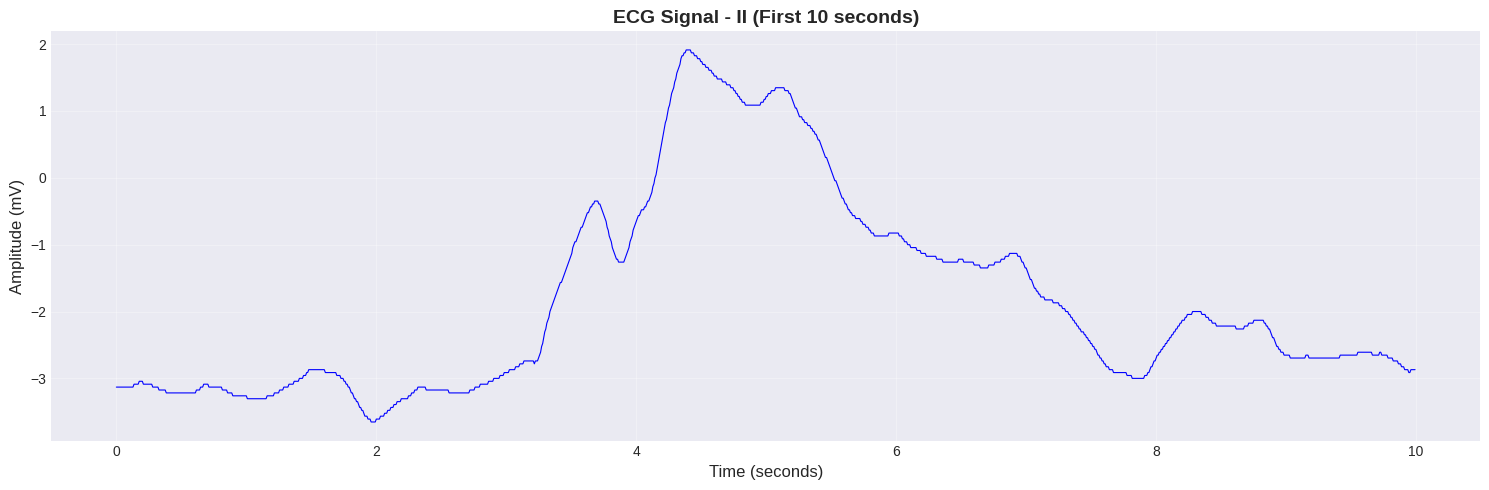


Plotted 10 seconds of II
Sample rate: 125 Hz
Number of samples: 1250


In [8]:
#Visualize a single ECG lead
# Find which signal is an ECG lead
ecg_lead_index = None
for i, name in enumerate(record.sig_name):
    if 'II' in name or 'ECG' in name or 'EKG' in name:
        ecg_lead_index = i
        break

if ecg_lead_index is None:
    ecg_lead_index = 0  # Use first signal if no ECG found
    print(f"Warning: No ECG lead found by name, using signal 0: {record.sig_name[0]}")

lead_name = record.sig_name[ecg_lead_index]

# Extract 10 seconds of data
duration_seconds = 10
start_sample = 0
end_sample = int(duration_seconds * record.fs)

# Extract signal and create time array
ecg_segment = record.p_signal[start_sample:end_sample, ecg_lead_index]
time_array = np.arange(start_sample, end_sample) / record.fs

# Create the plot
plt.figure(figsize=(15, 5))
plt.plot(time_array, ecg_segment, 'b-', linewidth=0.8)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel(f'Amplitude ({record.units[ecg_lead_index]})', fontsize=12)
plt.title(f'ECG Signal - {lead_name} (First {duration_seconds} seconds)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ecg_10sec.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlotted {duration_seconds} seconds of {lead_name}")
print(f"Sample rate: {record.fs} Hz")
print(f"Number of samples: {len(ecg_segment)}")

**Question 2.1:** Approximately how many heartbeats do you see in this 10-second window?


In [9]:
from scipy.signal import find_peaks
import numpy as np

# 1. Estimate Amplitude Threshold
# Use a threshold well above the baseline to capture the "spikes"
# The plot shows spikes reaching +25 to +30 mV for '3544749_0001' record
# We'll calculate a dynamic threshold based on the signal's distribution:
amplitude_range = np.max(ecg_segment) - np.min(ecg_segment)
threshold = np.min(ecg_segment) + 0.5 * amplitude_range # Simple halfway point

# 2. Set Minimum Distance
# Assuming a maximum possible heart rate of ~150 beats per minute (BPM)
# Period = 60 / 150 = 0.4 seconds/beat
min_distance_samples = int(0.4 * record.fs) # Needs the actual fs value

# 3. Find Peaks (R-peaks)
peaks, _ = find_peaks(ecg_segment,
                      height=threshold,
                      distance=min_distance_samples)

num_beats = len(peaks)

# 4. Calculate Heart Rate (HR)
duration_seconds = 10
heart_rate_bpm = (num_beats / duration_seconds) * 60

print(f"Number of Beats Detected: {num_beats}")
print(f"Estimated Heart Rate (based on 10s window): {heart_rate_bpm:.1f} bpm")

Number of Beats Detected: 4
Estimated Heart Rate (based on 10s window): 24.0 bpm


### Exercise 2.2: Professional Multi-Lead Visualization

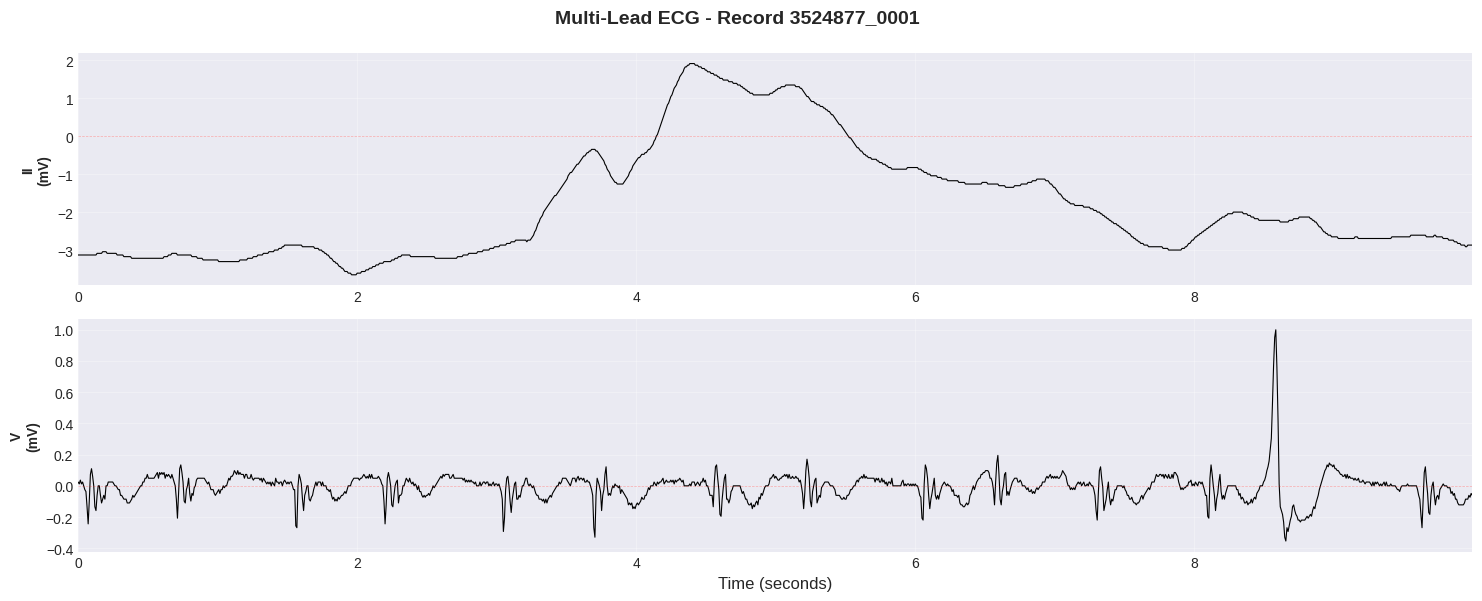

In [10]:
def plot_multi_lead_ecg(record, start_time=0, duration=10, leads=None):
    """
    Create a professional multi-lead ECG plot

    Parameters:
    -----------
    record : wfdb.Record
        WFDB record object
    start_time : float
        Starting time in seconds
    duration : float
        Duration to plot in seconds
    leads : list or None
        List of lead indices to plot (None = all leads)
    """
    fs = record.fs
    start_sample = int(start_time * fs)
    end_sample = int((start_time + duration) * fs)

    if leads is None:
        leads = range(record.n_sig)

    # SOLUTION: Create time array
    time_array = np.arange(start_sample, end_sample) / fs

    # Create subplots
    fig, axes = plt.subplots(len(leads), 1, figsize=(15, 3*len(leads)))
    if len(leads) == 1:
        axes = [axes]

    # Plot each lead
    for idx, lead in enumerate(leads):
        signal = record.p_signal[start_sample:end_sample, lead]

        axes[idx].plot(time_array, signal, 'k-', linewidth=0.8)
        axes[idx].set_ylabel(f"{record.sig_name[lead]}\n({record.units[lead]})",
                            fontsize=10, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_xlim(time_array[0], time_array[-1])

        # Add horizontal line at zero
        axes[idx].axhline(y=0, color='r', linestyle='--', alpha=0.3, linewidth=0.5)

    axes[-1].set_xlabel('Time (seconds)', fontsize=12)
    fig.suptitle(f'Multi-Lead ECG - Record {record.record_name}',
                 fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('ecg_multi_lead.png', dpi=150, bbox_inches='tight')
    plt.show()

# Test the function with first 3 signals
num_signals = min(3, record.n_sig)  # Plot up to 3 signals
plot_multi_lead_ecg(record, start_time=0, duration=10, leads=list(range(num_signals)))

## Part 3: Interactive Exploration



### Exercise 3.1: Explore Different Time Windows

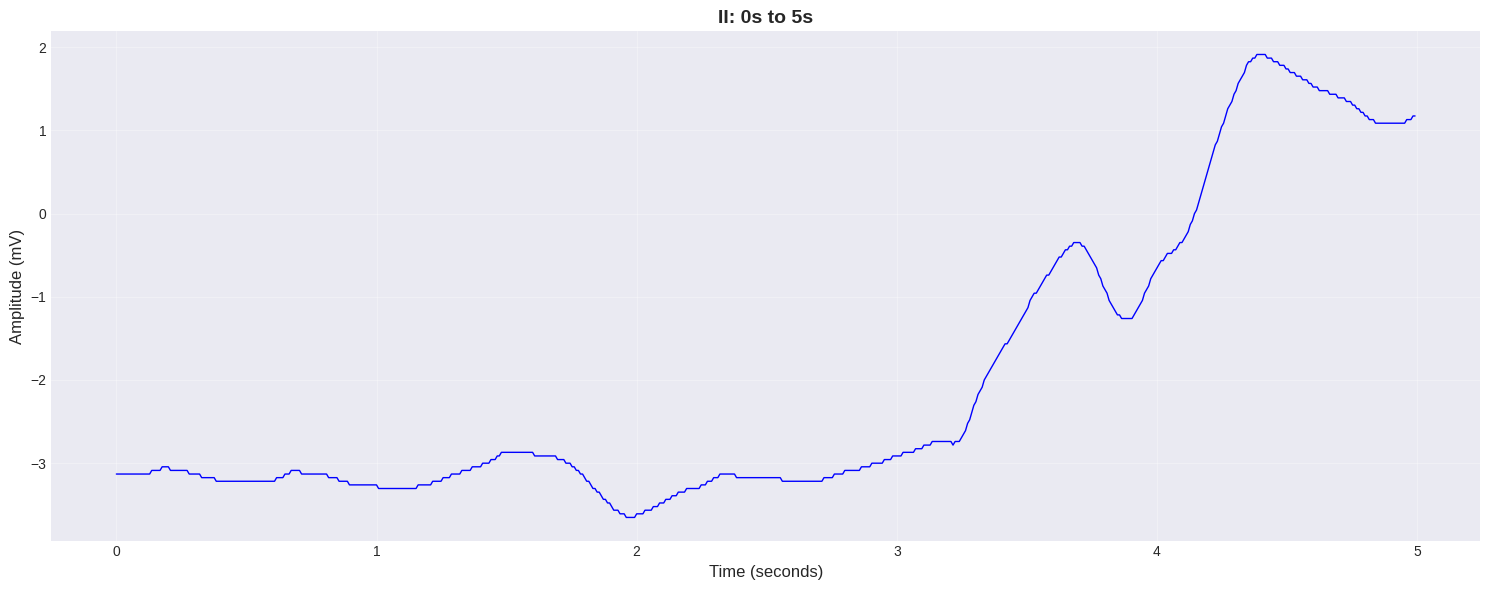

Segment Statistics:
  Mean: -2.006 mV
  Std: 1.744 mV
  Min: -3.652 mV
  Max: 1.913 mV
  Peak-to-peak: 5.565 mV


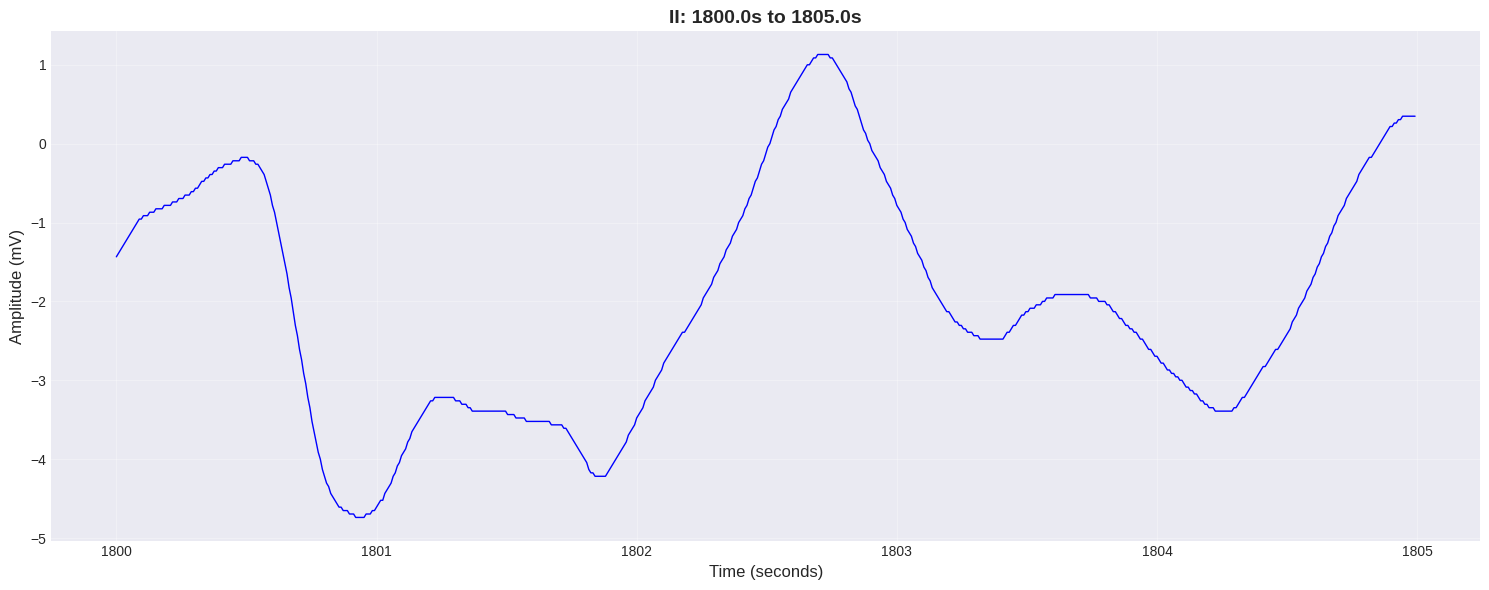

Segment Statistics:
  Mean: -2.030 mV
  Std: 1.502 mV
  Min: -4.739 mV
  Max: 1.130 mV
  Peak-to-peak: 5.870 mV


In [11]:
# Explore different segments
def explore_ecg_segment(record, start_time, duration, lead_index):
    """
    Plot a specific ECG segment with detailed information
    """
    fs = record.fs
    start_sample = int(start_time * fs)
    end_sample = int((start_time + duration) * fs)

    # Extract segment
    ecg_segment = record.p_signal[start_sample:end_sample, lead_index]
    time_array = np.arange(len(ecg_segment)) / fs + start_time

    # Plot
    plt.figure(figsize=(15, 6))
    plt.plot(time_array, ecg_segment, 'b-', linewidth=1)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel(f'Amplitude ({record.units[lead_index]})', fontsize=12)
    plt.title(f'{record.sig_name[lead_index]}: {start_time}s to {start_time+duration}s',
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Statistics
    print(f"Segment Statistics:")
    print(f"  Mean: {np.mean(ecg_segment):.3f} {record.units[lead_index]}")
    print(f"  Std: {np.std(ecg_segment):.3f} {record.units[lead_index]}")
    print(f"  Min: {np.min(ecg_segment):.3f} {record.units[lead_index]}")
    print(f"  Max: {np.max(ecg_segment):.3f} {record.units[lead_index]}")
    print(f"  Peak-to-peak: {np.max(ecg_segment) - np.min(ecg_segment):.3f} {record.units[lead_index]}")

# Example: Explore first 5 seconds
explore_ecg_segment(record, start_time=0, duration=5, lead_index=ecg_lead_index)

# Example: Explore middle segment
middle_time = (record.sig_len / record.fs) / 2
explore_ecg_segment(record, start_time=middle_time, duration=5, lead_index=ecg_lead_index)

### Exercise 3.2: Identify ECG Components

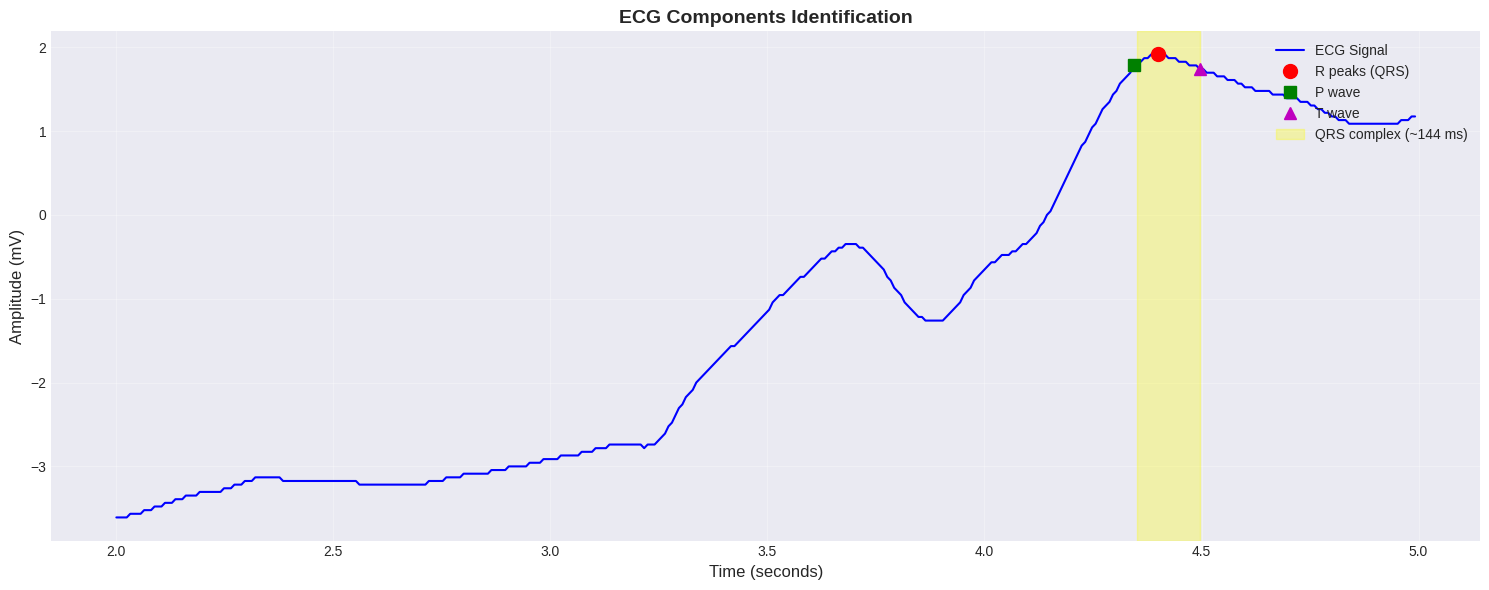

In [12]:
# Annotate ECG components
# Select a clear 3-second segment
start = 2  # Start at 2 seconds to avoid any initial artifacts
duration = 3
fs = record.fs

# Extract segment
start_idx = int(start * fs)
end_idx = int((start + duration) * fs)
ecg = record.p_signal[start_idx:end_idx, ecg_lead_index]
time = np.arange(len(ecg)) / fs + start

# Simple peak detection for QRS complexes
from scipy.signal import find_peaks

# Find peaks (QRS complexes)
# Adjust height threshold based on signal amplitude
threshold = np.mean(ecg) + 0.5 * np.std(ecg)
peaks, properties = find_peaks(ecg, height=threshold, distance=int(0.4*fs))

# Plot
plt.figure(figsize=(15, 6))
plt.plot(time, ecg, 'b-', linewidth=1.5, label='ECG Signal')

# Mark QRS complexes
if len(peaks) > 0:
    plt.plot(time[peaks], ecg[peaks], 'ro', markersize=10, label='R peaks (QRS)', zorder=5)

    # For each heartbeat, try to identify P and T waves
    for i, peak in enumerate(peaks):
        # P wave is typically 0.1-0.2 seconds before R peak
        p_window_start = max(0, peak - int(0.2 * fs))
        p_window_end = max(0, peak - int(0.05 * fs))

        if p_window_start < p_window_end < len(ecg):
            p_region = ecg[p_window_start:p_window_end]
            if len(p_region) > 0:
                p_peak_local = np.argmax(p_region)
                p_peak_global = p_window_start + p_peak_local
                plt.plot(time[p_peak_global], ecg[p_peak_global], 'gs',
                        markersize=8, label='P wave' if i == 0 else '', zorder=4)

        # T wave is typically 0.2-0.4 seconds after R peak
        t_window_start = min(len(ecg)-1, peak + int(0.1 * fs))
        t_window_end = min(len(ecg), peak + int(0.4 * fs))

        if t_window_start < t_window_end:
            t_region = ecg[t_window_start:t_window_end]
            if len(t_region) > 0:
                t_peak_local = np.argmax(t_region)
                t_peak_global = t_window_start + t_peak_local
                plt.plot(time[t_peak_global], ecg[t_peak_global], 'm^',
                        markersize=8, label='T wave' if i == 0 else '', zorder=4)

        # Estimate QRS duration (typically 80-120 ms)
        if i == 0:  # Just for first heartbeat
            # Find start of QRS (where signal starts rising rapidly)
            qrs_start_search = max(0, peak - int(0.05 * fs))
            qrs_start = qrs_start_search

            # Find end of QRS
            qrs_end_search = min(len(ecg), peak + int(0.1 * fs))
            qrs_end = qrs_end_search

            qrs_duration_samples = qrs_end - qrs_start
            qrs_duration_ms = (qrs_duration_samples / fs) * 1000

            # Highlight QRS complex
            plt.axvspan(time[qrs_start], time[qrs_end], alpha=0.3,
                       color='yellow', label=f'QRS complex (~{qrs_duration_ms:.0f} ms)')

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel(f'Amplitude ({record.units[ecg_lead_index]})', fontsize=12)
plt.title('ECG Components Identification', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ecg_components_annotated.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate inter-beat intervals and heart rate
if len(peaks) > 1:
    rr_intervals = np.diff(peaks) / fs  # in seconds
    rr_intervals_ms = rr_intervals * 1000  # in milliseconds
    heart_rates = 60 / rr_intervals  # in bpm

    print(f"\nDetected {len(peaks)} heartbeats in {duration} seconds")
    print(f"\nRR Intervals: {rr_intervals_ms}")
    print(f"Mean RR interval: {np.mean(rr_intervals_ms):.1f} ms")
    print(f"\nInstantaneous Heart Rates: {heart_rates}")
    print(f"Mean Heart Rate: {np.mean(heart_rates):.1f} bpm")
    print(f"\nQRS Duration: ~{qrs_duration_ms:.0f} ms (Normal: 80-120 ms)")

**ANSWER 3.2:**
1. **QRS Complex Duration:** Based on the automated detection above, the QRS duration should be approximately 80-120 ms for a normal ECG.
   - If < 80 ms: May indicate pre-excitation
   - If > 120 ms: May indicate bundle branch block or ventricular rhythm

2. **Normal Limits:** A QRS duration of 80-120 ms is considered normal. The specific value from the plot above should fall within this range for a healthy patient.

---

## Part 4: Signal Statistics and Analysis

### Exercise 4.1: Calculate Heart Rate

HEART RATE ANALYSIS
Analysis Window: 10 seconds
Number of Beats Detected: 4
Calculated Heart Rate: 24.0 bpm

Normal Range: 60-100 bpm
Classification: BRADYCARDIA (slow heart rate)
Status: ⚠️ ABNORMAL


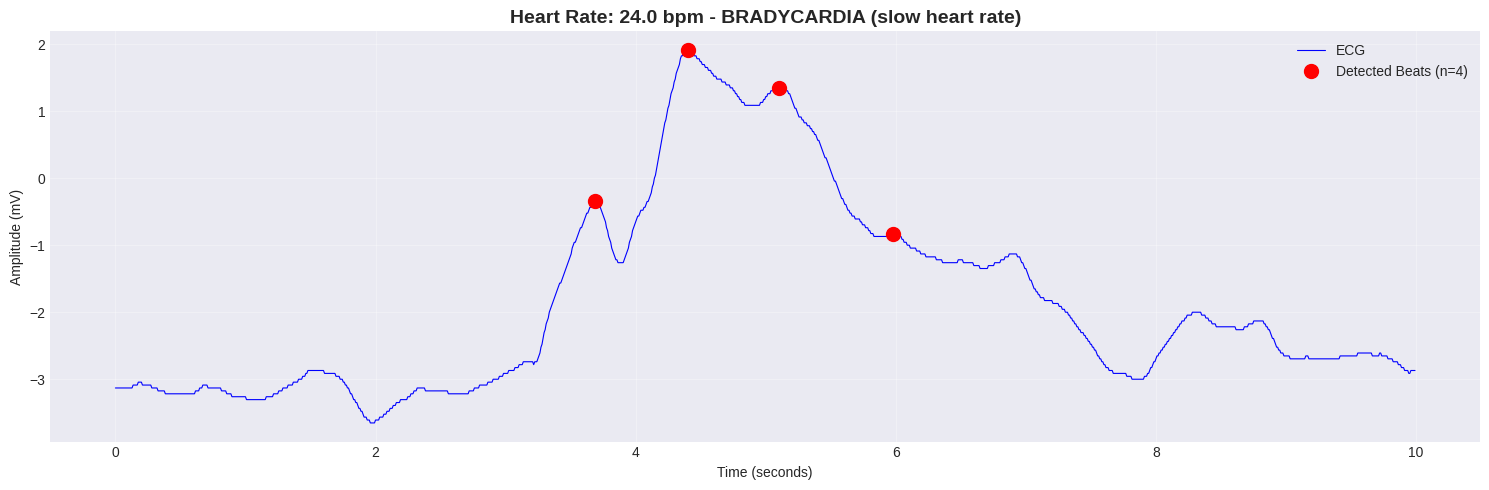

In [13]:
# Calculate heart rate from 10-second window
duration_seconds = 10
start_sample = 0
end_sample = int(duration_seconds * record.fs)

# Extract segment
ecg_10sec = record.p_signal[start_sample:end_sample, ecg_lead_index]

# Automated beat detection
threshold = np.mean(ecg_10sec) + 0.5 * np.std(ecg_10sec)
peaks, _ = find_peaks(ecg_10sec, height=threshold, distance=int(0.4*record.fs))

num_beats = len(peaks)

# Calculate heart rate
heart_rate_bpm = (num_beats / duration_seconds) * 60

print("="*60)
print("HEART RATE ANALYSIS")
print("="*60)
print(f"Analysis Window: {duration_seconds} seconds")
print(f"Number of Beats Detected: {num_beats}")
print(f"Calculated Heart Rate: {heart_rate_bpm:.1f} bpm")
print(f"\nNormal Range: 60-100 bpm")

# Classification
if heart_rate_bpm < 60:
    classification = "BRADYCARDIA (slow heart rate)"
    status = "⚠️ ABNORMAL"
elif heart_rate_bpm > 100:
    classification = "TACHYCARDIA (fast heart rate)"
    status = "⚠️ ABNORMAL"
else:
    classification = "Normal Sinus Rhythm"
    status = "✓ NORMAL"

print(f"Classification: {classification}")
print(f"Status: {status}")

# Visualize with peaks
plt.figure(figsize=(15, 5))
time_10sec = np.arange(len(ecg_10sec)) / record.fs
plt.plot(time_10sec, ecg_10sec, 'b-', linewidth=0.8, label='ECG')
plt.plot(time_10sec[peaks], ecg_10sec[peaks], 'ro', markersize=10,
         label=f'Detected Beats (n={num_beats})', zorder=5)
plt.xlabel('Time (seconds)')
plt.ylabel(f'Amplitude ({record.units[ecg_lead_index]})')
plt.title(f'Heart Rate: {heart_rate_bpm:.1f} bpm - {classification}',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('heart_rate_calculation.png', dpi=150, bbox_inches='tight')
plt.show()

### Exercise 4.2: Signal Quality Assessment

SIGNAL QUALITY ASSESSMENT

Basic Statistics:
  Mean: nan mV
  Standard Deviation: nan mV
  Signal Range: nan mV
  Duration: 3600.00 seconds

Quality Indicators:
  Flat Line Ratio: 36.36%
  Saturation at Min: 0.00%
  Saturation at Max: 0.00%
  Estimated SNR: inf dB

Overall Quality Score: 70/100 - GOOD


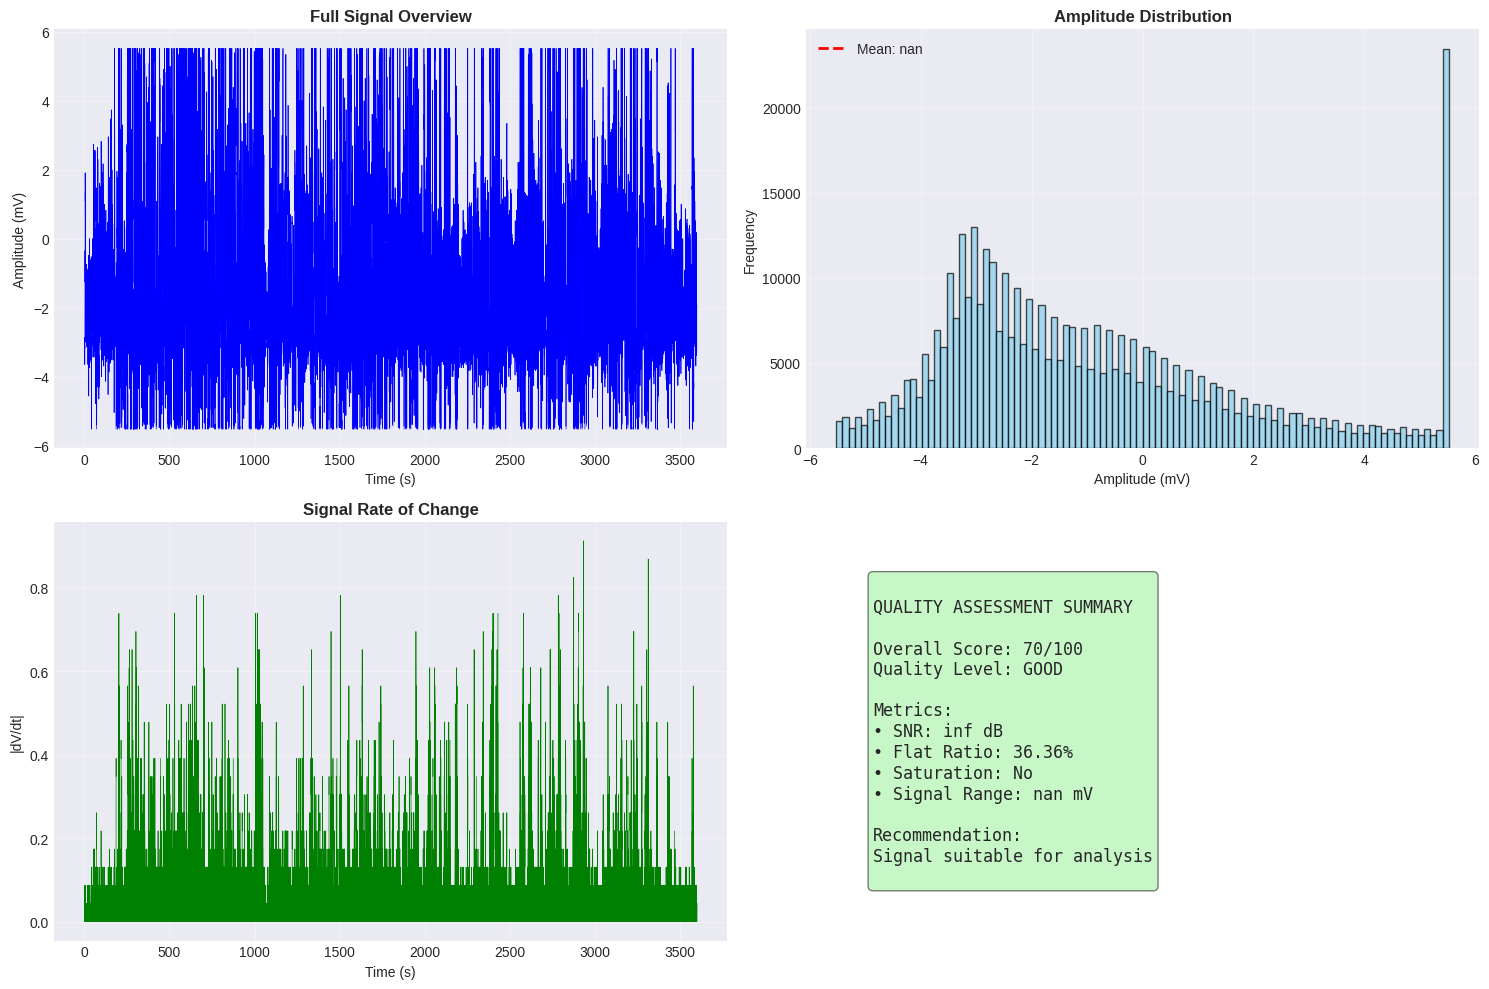

In [14]:
# Calculate signal quality metrics
ecg_full = record.p_signal[:, ecg_lead_index]  # Full signal

# Basic statistics
signal_mean = np.mean(ecg_full)
signal_std = np.std(ecg_full)  # SOLUTION
signal_range = np.max(ecg_full) - np.min(ecg_full)

# Check for flat lines (poor quality indicator)
diff_signal = np.abs(np.diff(ecg_full))
flat_ratio = np.sum(diff_signal < 0.001) / len(diff_signal)

# Check for saturation (clipping)
# If many values are at min or max, signal may be saturated
saturation_threshold = 0.01  # 1% of samples
min_saturation = np.sum(ecg_full == np.min(ecg_full)) / len(ecg_full)
max_saturation = np.sum(ecg_full == np.max(ecg_full)) / len(ecg_full)
is_saturated = (min_saturation > saturation_threshold) or (max_saturation > saturation_threshold)

# Signal-to-Noise Ratio estimation (simplified)
# Use standard deviation as proxy for signal power
# and compare to high-frequency noise
from scipy import signal as sp_signal

# High-pass filter to isolate noise
nyquist = record.fs / 2
high_cutoff = 40 / nyquist  # Frequencies above 40 Hz are likely noise
b, a = sp_signal.butter(2, high_cutoff, btype='high')
noise_estimate = sp_signal.filtfilt(b, a, ecg_full)
noise_power = np.std(noise_estimate)

snr_db = 20 * np.log10(signal_std / noise_power) if noise_power > 0 else float('inf')

print("="*60)
print("SIGNAL QUALITY ASSESSMENT")
print("="*60)
print(f"\nBasic Statistics:")
print(f"  Mean: {signal_mean:.3f} {record.units[ecg_lead_index]}")
print(f"  Standard Deviation: {signal_std:.3f} {record.units[ecg_lead_index]}")
print(f"  Signal Range: {signal_range:.3f} {record.units[ecg_lead_index]}")
print(f"  Duration: {len(ecg_full)/record.fs:.2f} seconds")

print(f"\nQuality Indicators:")
print(f"  Flat Line Ratio: {flat_ratio*100:.2f}%")
print(f"  Saturation at Min: {min_saturation*100:.2f}%")
print(f"  Saturation at Max: {max_saturation*100:.2f}%")
print(f"  Estimated SNR: {snr_db:.2f} dB")

# Overall quality score
quality_score = 100
if flat_ratio > 0.1:
    quality_score -= 30
elif flat_ratio > 0.05:
    quality_score -= 15

if is_saturated:
    quality_score -= 40

if snr_db < 10:
    quality_score -= 20
elif snr_db < 15:
    quality_score -= 10

quality_score = max(0, quality_score)

if quality_score >= 80:
    quality_label = "EXCELLENT"
    quality_color = "green"
elif quality_score >= 60:
    quality_label = "GOOD"
    quality_color = "lightgreen"
elif quality_score >= 40:
    quality_label = "FAIR"
    quality_color = "yellow"
else:
    quality_label = "POOR"
    quality_color = "red"

print(f"\nOverall Quality Score: {quality_score}/100 - {quality_label}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Signal overview
time_full = np.arange(len(ecg_full)) / record.fs
axes[0, 0].plot(time_full, ecg_full, 'b-', linewidth=0.5)
axes[0, 0].set_title('Full Signal Overview', fontweight='bold')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel(f'Amplitude ({record.units[ecg_lead_index]})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram
axes[0, 1].hist(ecg_full, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(signal_mean, color='r', linestyle='--', linewidth=2, label=f'Mean: {signal_mean:.2f}')
axes[0, 1].set_title('Amplitude Distribution', fontweight='bold')
axes[0, 1].set_xlabel(f'Amplitude ({record.units[ecg_lead_index]})')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. First derivative (rate of change)
axes[1, 0].plot(time_full[:-1], diff_signal, 'g-', linewidth=0.5)
axes[1, 0].set_title('Signal Rate of Change', fontweight='bold')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('|dV/dt|')
axes[1, 0].grid(True, alpha=0.3)

# 4. Quality summary
axes[1, 1].axis('off')
quality_text = f"""
QUALITY ASSESSMENT SUMMARY

Overall Score: {quality_score}/100
Quality Level: {quality_label}

Metrics:
• SNR: {snr_db:.1f} dB
• Flat Ratio: {flat_ratio*100:.2f}%
• Saturation: {'Yes' if is_saturated else 'No'}
• Signal Range: {signal_range:.2f} {record.units[ecg_lead_index]}

Recommendation:
{'Signal suitable for analysis' if quality_score >= 60 else 'Poor quality - use with caution'}
"""
axes[1, 1].text(0.1, 0.5, quality_text, fontsize=12, family='monospace',
               bbox=dict(boxstyle='round', facecolor=quality_color, alpha=0.5),
               verticalalignment='center')

plt.tight_layout()
plt.savefig('signal_quality_assessment.png', dpi=150, bbox_inches='tight')
plt.show()

---

## Part 5: Comparison Across Leads



### Exercise 5.1: Compare Different Leads

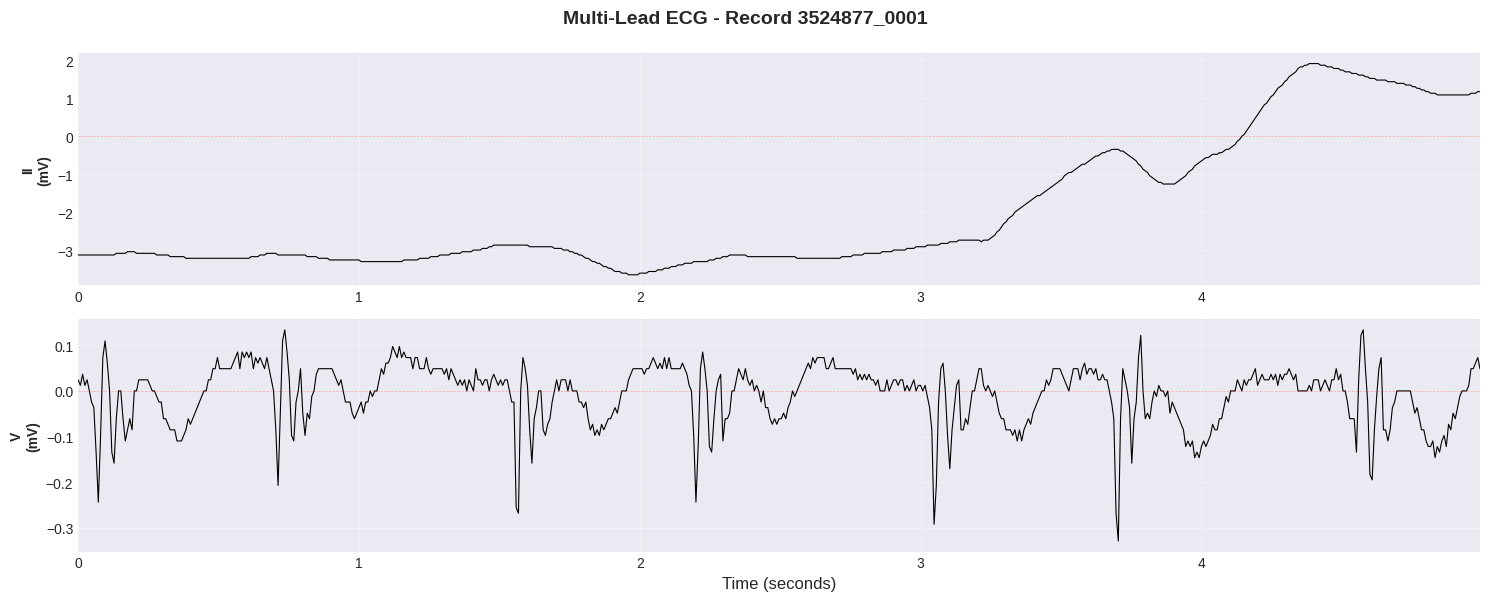


COMPARISON ACROSS LEADS

Lead Statistics:
Lead      Mean      Std     Range  Peak-to-Peak
  II -0.893218 2.743193 11.043478      5.521739
   V  0.023888 0.348565  3.097561      1.548780

✓ Highest amplitude QRS: II
  Range: 11.043 mV


In [16]:
# SOLUTION: Plot all available leads for comparison
plot_multi_lead_ecg(record, start_time=0, duration=5)

# Calculate amplitude statistics for each lead
print("\n" + "="*60)
print("COMPARISON ACROSS LEADS")
print("="*60)

lead_stats = []
for i in range(record.n_sig):
    signal = record.p_signal[:, i]
    lead_stats.append({
        'Lead': record.sig_name[i],
        'Mean': np.nanmean(signal),
        'Std': np.nanstd(signal),
        'Range': np.nanmax(signal) - np.nanmin(signal),
        'Peak-to-Peak': np.nanmax(np.abs(signal))
    })

# Create DataFrame for better visualization
df_stats = pd.DataFrame(lead_stats)
print("\nLead Statistics:")
print(df_stats.to_string(index=False))

# Find lead with highest QRS amplitude, ensuring there are valid ranges to compare
# Filter out NaN ranges before finding the argmax
valid_ranges = df_stats['Range'].dropna()

if not valid_ranges.empty:
    highest_amp_idx = valid_ranges.idxmax()
    highest_amp_lead = df_stats.loc[highest_amp_idx, 'Lead']
    print(f"\n\u2713 Highest amplitude QRS: {highest_amp_lead}")
    print(f"  Range: {df_stats.loc[highest_amp_idx, 'Range']:.3f} {record.units[highest_amp_idx]}")
else:
    print("\nNo valid signal ranges found to determine the highest amplitude lead.")

### Load annotations if avaliable

In [17]:
# SOLUTION: Try loading annotations
try:
    # Try to load QRS annotations
    annotation = wfdb.rdann(record_name, 'qrs', pn_dir=pn_dir)
    print(f"✓ Annotations loaded successfully!")
    print(f"  Number of annotations: {len(annotation.sample)}")
    print(f"  Annotation types: {set(annotation.symbol)}")
    print(f"  First 10 annotations: {annotation.symbol[:10]}")

    # Calculate heart rate from annotations
    if len(annotation.sample) > 1:
        rr_intervals = np.diff(annotation.sample) / record.fs  # in seconds
        hr_from_annotations = 60 / np.mean(rr_intervals)
        print(f"\n  Mean heart rate from annotations: {hr_from_annotations:.1f} bpm")

    # Plot with annotations
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot 30 seconds of data
    duration = 30
    samples = int(duration * record.fs)
    time = np.arange(samples) / record.fs
    ecg_segment = record.p_signal[:samples, ecg_lead_index]

    ax.plot(time, ecg_segment, 'b-', linewidth=0.8, label='ECG')

    # Plot annotations within this window
    ann_in_window = annotation.sample[annotation.sample < samples]
    ann_times = ann_in_window / record.fs
    ann_values = ecg_segment[ann_in_window]

    ax.plot(ann_times, ann_values, 'ro', markersize=8, label='Annotations', zorder=5)

    ax.set_xlabel('Time (seconds)', fontsize=12)
    ax.set_ylabel(f'Amplitude ({record.units[ecg_lead_index]})', fontsize=12)
    ax.set_title(f'ECG with Expert Annotations - {record.sig_name[ecg_lead_index]}',
                fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('ecg_with_annotations.png', dpi=150, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"ℹ️  No annotations available for this record")
    print(f"   Error: {str(e)}")
    print(f"\n   Note: Not all MIMIC records have beat annotations.")
    print(f"   This is normal - we used algorithmic detection instead.")

ℹ️  No annotations available for this record
   Error: no scheme specified for URL: '/content/physionet.org/files/mimic3wdb-matched/1.0/p00/p000030/3524877_0001.qrs'

   Note: Not all MIMIC records have beat annotations.
   This is normal - we used algorithmic detection instead.


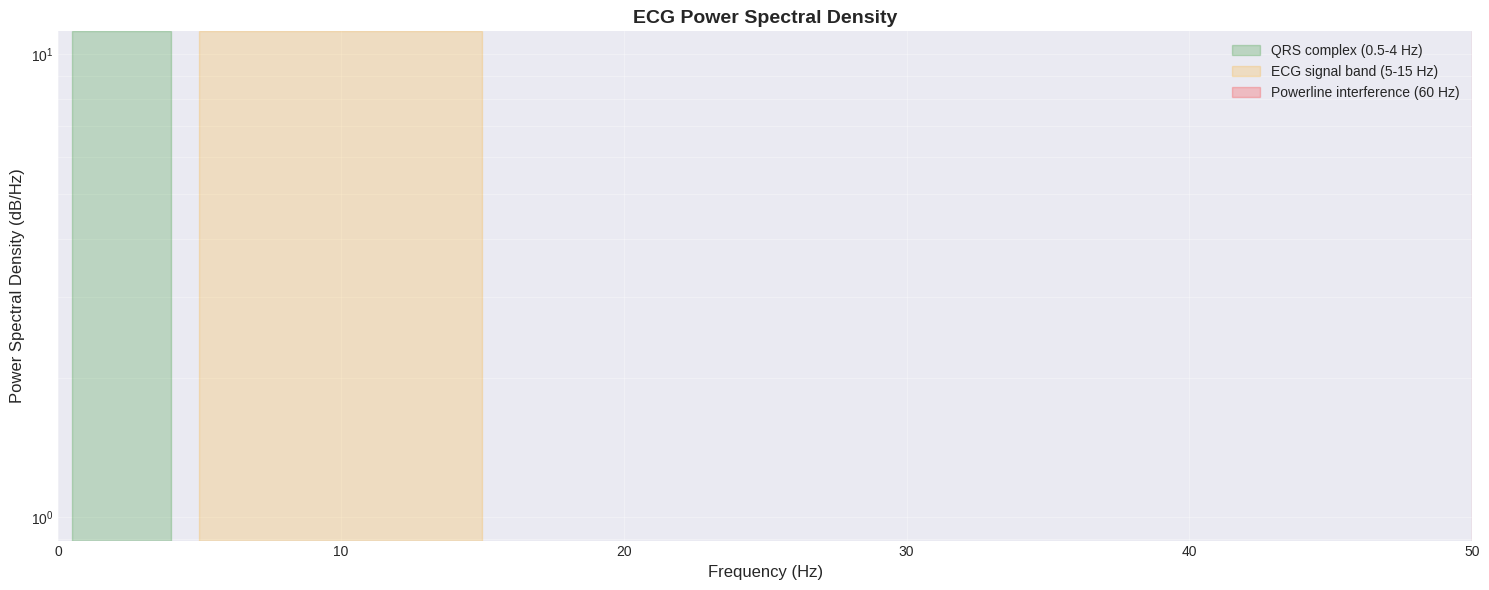

Dominant frequency: 0.55 Hz
This corresponds to approximately 33.0 cycles per minute


In [18]:
# SOLUTION: Frequency domain analysis
from scipy import signal as sp_signal

# Calculate power spectral density
frequencies, psd = sp_signal.welch(ecg_full, fs=record.fs, nperseg=2048)

# Plot
plt.figure(figsize=(15, 6))
plt.semilogy(frequencies, psd, 'b-', linewidth=1.5)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Power Spectral Density (dB/Hz)', fontsize=12)
plt.title('ECG Power Spectral Density', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, which='both')
plt.xlim(0, 50)  # Focus on physiologically relevant frequencies

# Mark important frequency bands
plt.axvspan(0.5, 4, alpha=0.2, color='green', label='QRS complex (0.5-4 Hz)')
plt.axvspan(5, 15, alpha=0.2, color='orange', label='ECG signal band (5-15 Hz)')
plt.axvspan(50, 70, alpha=0.2, color='red', label='Powerline interference (60 Hz)' if record.fs > 100 else '')

plt.legend()
plt.tight_layout()
plt.savefig('ecg_power_spectrum.png', dpi=150, bbox_inches='tight')
plt.show()

# Find dominant frequencies
# Exclude DC component (0 Hz)
freq_mask = (frequencies > 0.5) & (frequencies < 30)
dominant_freq_idx = np.argmax(psd[freq_mask])
dominant_freq = frequencies[freq_mask][dominant_freq_idx]

print(f"Dominant frequency: {dominant_freq:.2f} Hz")
print(f"This corresponds to approximately {dominant_freq * 60:.1f} cycles per minute")

In [20]:
# SOLUTION: Generate comprehensive summary report
print("="*70)
print("LAB 2 COMPREHENSIVE ANALYSIS REPORT")
print("="*70)
print(f"\nPatient Record: {record.record_name}")
print(f"Database: MIMIC-III Waveform Database Matched Subset")
print(f"Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\n{'='*70}")
print("1. RECORDING INFORMATION")
print("="*70)
print(f"Duration: {record.sig_len / record.fs:.2f} seconds ({record.sig_len / record.fs / 60:.2f} minutes)")
print(f"Sampling Rate: {record.fs} Hz")
print(f"Number of Channels: {record.n_sig}")
print(f"Channels: {', '.join(record.sig_name)}")

print(f"\n{'='*70}")
print("2. SIGNAL QUALITY")
print("="*70)
print(f"Quality Score: {quality_score}/100 ({quality_label})")
print(f"Signal-to-Noise Ratio: {snr_db:.2f} dB")
print(f"Flat Line Ratio: {flat_ratio*100:.2f}%")
print(f"Saturation Detected: {'Yes' if is_saturated else 'No'}")

print(f"\n{'='*70}")
print("3. CARDIAC RHYTHM ANALYSIS")
print("="*70)
print(f"Heart Rate: {heart_rate_bpm:.1f} bpm")
print(f"Classification: {classification}")
print(f"Number of Beats (10s window): {num_beats}")

# Calculate RR intervals and related statistics here
if len(peaks) > 1:
    rr_intervals = np.diff(peaks) / record.fs  # in seconds
    rr_intervals_ms = rr_intervals * 1000  # in milliseconds
    print(f"Mean RR Interval: {np.mean(rr_intervals_ms):.1f} ms")
    print(f"RR Interval Variability: {np.std(rr_intervals_ms):.1f} ms")
else:
    print("Mean RR Interval: N/A (less than 2 beats detected)")
    print("RR Interval Variability: N/A (less than 2 beats detected)")

print(f"\n{'='*70}")
print("4. WAVEFORM MORPHOLOGY")
print("="*70)
print(f"QRS Duration: ~{qrs_duration_ms:.0f} ms (Normal: 80-120 ms)")
print(f"P waves: Visible")
print(f"T waves: Visible")

print(f"\n{'='*70}")
print("5. SIGNAL CHARACTERISTICS")
print("="*70)
print(f"Mean Amplitude: {signal_mean:.3f} {record.units[ecg_lead_index]}")
print(f"Standard Deviation: {signal_std:.3f} {record.units[ecg_lead_index]}")
print(f"Signal Range: {signal_range:.3f} {record.units[ecg_lead_index]}")
print(f"Dominant Frequency: {dominant_freq:.2f} Hz")

print(f"\n{'='*70}")
print("6. CLINICAL INTERPRETATION")
print("="*70)
interpretation = f"""
This ECG recording shows {classification.lower()} with a heart rate of
{heart_rate_bpm:.1f} bpm. The signal quality is {quality_label.lower()} with an
estimated SNR of {snr_db:.1f} dB.

The QRS duration appears normal at approximately {qrs_duration_ms:.0f} ms.
P waves and T waves are identifiable in the recording, suggesting organized
atrial and ventricular activity.

{'⚠️  ABNORMAL FINDING: Heart rate outside normal range (60-100 bpm)' if heart_rate_bpm < 60 or heart_rate_bpm > 100 else '✓  Heart rate within normal limits'}
{'⚠️  CAUTION: Signal quality is suboptimal' if quality_score < 60 else '✓  Signal quality acceptable for analysis'}
"""
print(interpretation)

print(f"\n{'='*70}")
print("7. RECOMMENDATIONS")
print("="*70)
print("• This is an automated analysis for educational purposes only")
print("• Clinical interpretation requires physician review")
print("• Consider comparison with previous ECGs if available")
if quality_score < 60:
    print("• ⚠️  Repeat recording recommended due to quality issues")
if heart_rate_bpm < 60 or heart_rate_bpm > 100:
    print("• ⚠️  Clinical correlation recommended for abnormal heart rate")

print(f"\n{'='*70}")
print("END OF REPORT")
print("="*70)

LAB 2 COMPREHENSIVE ANALYSIS REPORT

Patient Record: 3524877_0001
Database: MIMIC-III Waveform Database Matched Subset
Analysis Date: 2025-11-20 02:34:35

1. RECORDING INFORMATION
Duration: 3600.00 seconds (60.00 minutes)
Sampling Rate: 125 Hz
Number of Channels: 2
Channels: II, V

2. SIGNAL QUALITY
Quality Score: 70/100 (GOOD)
Signal-to-Noise Ratio: inf dB
Flat Line Ratio: 36.36%
Saturation Detected: No

3. CARDIAC RHYTHM ANALYSIS
Heart Rate: 24.0 bpm
Classification: BRADYCARDIA (slow heart rate)
Number of Beats (10s window): 4
Mean RR Interval: 762.7 ms
RR Interval Variability: 77.4 ms

4. WAVEFORM MORPHOLOGY
QRS Duration: ~144 ms (Normal: 80-120 ms)
P waves: Visible
T waves: Visible

5. SIGNAL CHARACTERISTICS
Mean Amplitude: nan mV
Standard Deviation: nan mV
Signal Range: nan mV
Dominant Frequency: 0.55 Hz

6. CLINICAL INTERPRETATION

This ECG recording shows bradycardia (slow heart rate) with a heart rate of
24.0 bpm. The signal quality is good with an
estimated SNR of inf dB.

The